<a href="https://colab.research.google.com/github/87tana/YOLOv8-Bone-Fracture-Detection-Model/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Navigate to the project directory
%cd '/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/'

# Define dataset path
dataset_path = '/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset'

# Install necessary libraries
!pip install -q ultralytics torch torchvision opencv-python pillow matplotlib tqdm

Mounted at /content/drive/
/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 16.1 MB/s eta 0:00:00


In [3]:
# Import required libraries
import os
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Dataset Exploration and Validation

In [4]:
# -------------------- Train Dataset --------------------
print("\nExploring Train Dataset...")
train_images_dir = os.path.join(dataset_path, "train/images")  # Train images directory
train_labels_dir = os.path.join(dataset_path, "train/labels")  # Train labels directory

# List and sort train image and label files
train_image_files = sorted([f for f in os.listdir(train_images_dir) if f.endswith(('.jpg', '.png'))])
train_label_files = sorted([f for f in os.listdir(train_labels_dir) if f.endswith('.txt')])


# Summary for train dataset
print(f"Total number of train images: {len(train_image_files)}")
print(f"Total number of train labels: {len(train_label_files)}")

if train_image_files and train_label_files:
    print(f"Sample train image file: {train_image_files[0]}")
    print(f"Sample train label file: {train_label_files[0]}")
else:
    print("Warning: Train dataset directories are empty!")

if len(train_image_files) != len(train_label_files):
    print("Warning: Train dataset - number of images and labels do not match!")
else:
    print("Train dataset is consistent.")


Exploring Train Dataset...
Total number of train images: 3779
Total number of train labels: 3779
Sample train image file: 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg
Sample train label file: 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.txt
Train dataset is consistent.


In [5]:
# -------------------- Validation Dataset --------------------
print("\nExploring Validation Dataset...")
validation_images_dir = os.path.join(dataset_path, "valid/images")  # Corrected Validation images directory
validation_labels_dir = os.path.join(dataset_path, "valid/labels")  # Corrected Validation labels directory

# List and sort validation image and label files
validation_image_files = sorted([f for f in os.listdir(validation_images_dir) if f.endswith(('.jpg', '.png'))])
validation_label_files = sorted([f for f in os.listdir(validation_labels_dir) if f.endswith('.txt')])

# Summary for validation dataset
print(f"Total number of validation images: {len(validation_image_files)}")
print(f"Total number of validation labels: {len(validation_label_files)}")

if validation_image_files and validation_label_files:
    print(f"Sample validation image file: {validation_image_files[0]}")
    print(f"Sample validation label file: {validation_label_files[0]}")
else:
    print("Warning: Validation dataset directories are empty!")

if len(validation_image_files) != len(validation_label_files):
    print("Warning: Validation dataset - number of images and labels do not match!")
else:
    print("Validation dataset is consistent.")


Exploring Validation Dataset...
Total number of validation images: 835
Total number of validation labels: 835
Sample validation image file: bone-cancer_jpg.rf.639a15ed69b01b4dca593a1eb7062e1c.jpg
Sample validation label file: bone-cancer_jpg.rf.639a15ed69b01b4dca593a1eb7062e1c.txt
Validation dataset is consistent.


In [6]:
# -------------------- Test Dataset --------------------
print("\nExploring Test Dataset...")
test_images_dir = os.path.join(dataset_path, "test/images")  # Test images directory
test_labels_dir = os.path.join(dataset_path, "test/labels")  # Test labels directory

# List and sort test image and label files
test_image_files = sorted([f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.png'))])
test_label_files = sorted([f for f in os.listdir(test_labels_dir) if f.endswith('.txt')])

# Summary for test dataset
print(f"Total number of test images: {len(test_image_files)}")
print(f"Total number of test labels: {len(test_label_files)}")

if test_image_files and test_label_files:
    print(f"Sample test image file: {test_image_files[0]}")
    print(f"Sample test label file: {test_label_files[0]}")
else:
    print("Warning: Test dataset directories are empty!")

if len(test_image_files) != len(test_label_files):
    print("Warning: Test dataset - number of images and labels do not match!")
else:
    print("Test dataset is consistent.")


Exploring Test Dataset...
Total number of test images: 841
Total number of test labels: 841
Sample test image file: Scanning-X-ray-Image-of-Lower-Leg-Bone_png.rf.1d4f4468fcb69c1d0fc474ebbbb5b278.jpg
Sample test label file: Scanning-X-ray-Image-of-Lower-Leg-Bone_png.rf.1d4f4468fcb69c1d0fc474ebbbb5b278.txt
Test dataset is consistent.


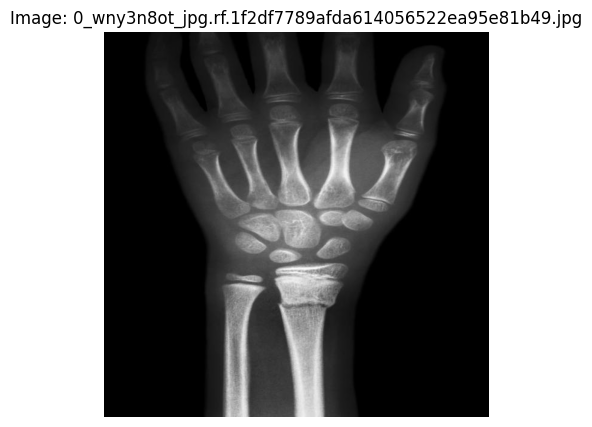

In [7]:
# Function to display an image
def show_image(image_path):
    """
    Display an image using Matplotlib.
    Args:
        image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path)  # Load the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.show()

# Show the first image in the dataset
sample_image_path = os.path.join(train_images_dir,train_image_files[0])
show_image(sample_image_path)

## Converting the YOLO format bounding boxes from normalized coordinates to pixel values.

In [8]:
def load_yolo_annotations(txt_file, image_width, image_height):
    """
    Load YOLO annotations and convert them to pixel coordinates.
    Args:
        txt_file (str): Path to the YOLO `.txt` annotation file.
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
    Returns:
        List of bounding boxes in pixel coordinates.
        Each box: (class_id, x_min, y_min, width_pixel, height_pixel)
    """
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            class_id = int(data[0])  # Class ID (optional for now)
            x_center, y_center, width, height = map(float, data[1:])

            # Convert normalized YOLO coordinates to pixel coordinates
            x_center_pixel = int(x_center * image_width)
            y_center_pixel = int(y_center * image_height)
            width_pixel = int(width * image_width)
            height_pixel = int(height * image_height)

            # Calculate top-left corner
            x_min = int(x_center_pixel - width_pixel / 2)
            y_min = int(y_center_pixel - height_pixel / 2)
            boxes.append((class_id, x_min, y_min, width_pixel, height_pixel))
    return boxes


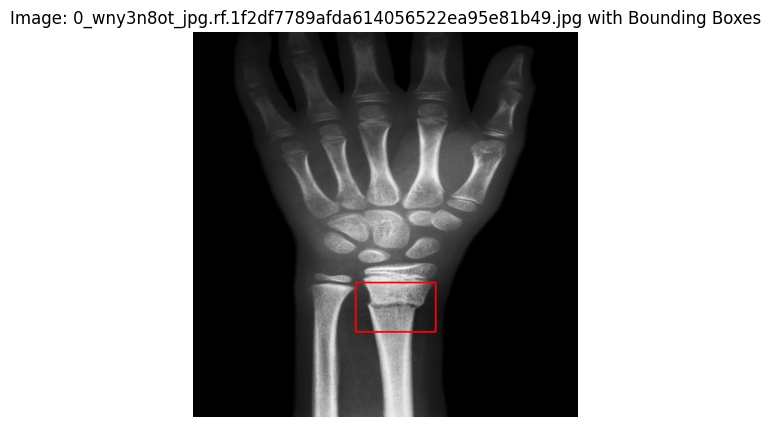

In [9]:
def visualize_image_with_boxes(train_images_dir, annotation_path):
    """
    Visualize an image with YOLOv8 bounding boxes.
    Args:
        image_path (str): Path to the image file.
        annotation_path (str): Path to the YOLO annotation file.
    """
    # Load image
    image = cv2.imread(train_images_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_height, image_width = image.shape[:2]

    # Load YOLO annotations
    boxes = load_yolo_annotations(annotation_path, image_width, image_height)

    # Draw bounding boxes on the image
    for box in boxes:
        class_id, x_min, y_min, width_pixel, height_pixel = box
        # Draw rectangle (bounding box)
        cv2.rectangle(image, (x_min, y_min), (x_min + width_pixel, y_min + height_pixel), color=(255, 0, 0), thickness=2)

    # Display the image with bounding boxes
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.title(f"Image: {os.path.basename(train_images_dir)} with Bounding Boxes")
    plt.show()

# Test the visualization with the first image and annotation
sample_image_path = os.path.join(train_images_dir, train_image_files[0])
sample_label_path = os.path.join(train_labels_dir, os.path.splitext(train_image_files[0])[0] + '.txt')
visualize_image_with_boxes(sample_image_path, sample_label_path)

## Number of bounding box for an image

In [10]:
def count_bounding_boxes(txt_file):
    """
    Count how many bounding boxes exist in the given YOLO annotation file.
    Args:
        txt_file (str): Path to the YOLO `.txt` annotation file.
    Returns:
        int: Number of bounding boxes in the image.
    """
    with open(txt_file, 'r') as f:
        lines = f.readlines()
    return len(lines)

# Example usage for counting bounding boxes in the first image
sample_label_path = os.path.join(train_labels_dir, os.path.splitext(train_image_files[0])[0] + '.txt')
num_boxes = count_bounding_boxes(sample_label_path)
print(f"Number of bounding boxes in image {train_image_files[0]}: {num_boxes}")

Number of bounding boxes in image 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg: 1


## check the bounding box of the first image in the training set

In [11]:
# Function to load YOLO annotations and calculate bounding box sizes
def get_bounding_box_sizes(txt_file, image_width, image_height):
    """
    Extract and calculate the size of each bounding box from a YOLO annotation file.
    Args:
        txt_file (str): Path to the YOLO `.txt` annotation file.
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
    Returns:
        list: List of bounding box sizes in pixels (width x height).
    """
    bounding_box_sizes = []
    with open(txt_file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        data = line.strip().split()
        # YOLO annotation format: class_id, x_center, y_center, width, height
        x_center, y_center, width, height = map(float, data[1:])

        # Convert YOLO coordinates to pixel values
        width_pixel = int(width * image_width)
        height_pixel = int(height * image_height)

        # Append the size (width * height) to the list
        bounding_box_sizes.append((width_pixel, height_pixel))

    return bounding_box_sizes

# Get the first image and label path
sample_label_path = os.path.join(train_labels_dir, os.path.splitext(train_image_files[0])[0] + '.txt')

# Load the first image to get its width and height
sample_image_path = os.path.join(train_images_dir, train_image_files[0])
image = cv2.imread(sample_image_path)
image_height, image_width = image.shape[:2]

# Get the bounding box sizes
bounding_box_sizes = get_bounding_box_sizes(sample_label_path, image_width, image_height)

# Print the bounding box sizes for the first image
print(f"Bounding box sizes (width x height) for the first image {train_image_files[0]}:")
for size in bounding_box_sizes:
    print(f"Width: {size[0]} px, Height: {size[1]} px")


Bounding box sizes (width x height) for the first image 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg:
Width: 133 px, Height: 82 px


## File name

In [12]:
# Train images
train_images_dir = "/content/drive/MyDrive/Project_Experiments/Bone_Fraction_Detection/Fraction_Detection_Dataset/train/images"

# List all files in the train images directory
train_image_files = sorted([f for f in os.listdir(train_images_dir) if f.endswith(('.jpg'))])

# Print first 5 file names to check
print(train_image_files[:2])


['0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg', '0_wny3n8ot_jpg.rf.2e107e048b63fdfabebb0e69def314c7.jpg']


# Image size  --> we need cv2 (w,h)

In [13]:
def get_image_size(image_path):
    """
    Get the size (width, height) of an image.
    Args:
        image_path (str): Path to the image file.
    Returns:
        tuple: (width, height) of the image
    """
    image = cv2.imread(image_path)
    height, width = image.shape[:2]  # Get height and width of the image
    return width, height

# Example: Get size of the first image in the dataset
image_path = os.path.join(train_images_dir, train_image_files[0])
image_size = get_image_size(image_path)
print(f"Size of image {train_image_files[0]}: {image_size}")


Size of image 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg: (640, 640)


# Number of bbx

In [14]:
def count_bounding_boxes(txt_file):
    """
    Count how many bounding boxes exist in the given YOLO annotation file.
    Args:
        txt_file (str): Path to the YOLO `.txt` annotation file.
    Returns:
        int: Number of bounding boxes in the image.
    """
    with open(txt_file, 'r') as f:
        lines = f.readlines()
    return len(lines)

# Example: Count the number of bounding boxes for the first image
label_file_path = os.path.join(train_labels_dir, os.path.splitext(train_image_files[0])[0] + '.txt')
num_bounding_boxes = count_bounding_boxes(label_file_path)
print(f"Number of bounding boxes in image {train_image_files[0]}: {num_bounding_boxes}")


Number of bounding boxes in image 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg: 1


# Bounding box size

In [15]:
def get_bounding_box_sizes(txt_file, image_width, image_height):
    """
    Get the sizes (width, height) of bounding boxes in pixels.
    Args:
        txt_file (str): Path to the YOLO `.txt` annotation file.
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
    Returns:
        list: List of tuples containing (width, height) of each bounding box in pixels.
    """
    bounding_box_sizes = []
    with open(txt_file, 'r') as f:
        for line in f.readlines():
            data = line.strip().split()
            x_center, y_center, width, height = map(float, data[1:])

            # Convert to pixel coordinates
            width_pixel = int(width * image_width)
            height_pixel = int(height * image_height)

            # Append size to the list
            bounding_box_sizes.append((width_pixel, height_pixel))

    return bounding_box_sizes

# Example: Get bounding box sizes for the first image
bounding_box_sizes = get_bounding_box_sizes(label_file_path, image_size[0], image_size[1])
print(f"Bounding box sizes for image {train_image_files[0]}: {bounding_box_sizes}")


Bounding box sizes for image 0_wny3n8ot_jpg.rf.1f2df7789afda614056522ea95e81b49.jpg: [(133, 82)]


# Display images with bounding box

<ipython-input-23-55aa799bec50>:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


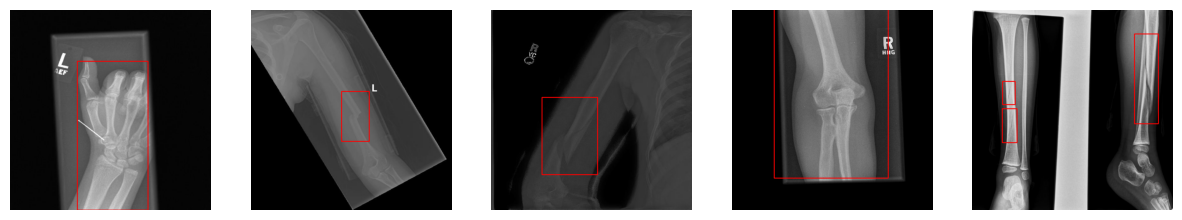

In [23]:
def visualize_images_with_better_spacing(validation_images_dir, validation_labels_dir, num_images=5):
    """
    Visualize images with bounding boxes in a grid layout, improving spacing between images and labels.
    """
    # Select random images
    random_images = random.sample(validation_image_files, num_images)

    # Define grid size
    num_columns = min(5, num_images)  # Max 5 columns per row
    num_rows = (num_images + num_columns - 1) // num_columns  # Calculate required rows

    # Create the figure
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows), gridspec_kw={'hspace': 0.4})  # Adjust hspace for spacing
    axs = axs.ravel()  # Flatten the grid for easy indexing

    for i, img_file in enumerate(random_images):
        # Image path
        img_path = os.path.join(validation_images_dir, img_file)

        # Corresponding label path
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(validation_labels_dir, label_file)

        # Read the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_height, img_width = img.shape[:2]

        # Read bounding boxes
        boxes = load_yolo_annotations(label_path, img_width, img_height)

        # Draw bounding boxes
        for _, x_min, y_min, box_width, box_height in boxes:
            x_max = x_min + box_width
            y_max = y_min + box_height
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)

        # Display the image in the subplot
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title("")  # Remove the title (label) entirely


    # Turn off unused axes
    for j in range(len(random_images), len(axs)):
        axs[j].axis('off')

    # Display the grid
    plt.tight_layout()
    plt.show()

# Visualize 5 images in a grid with better spacing
visualize_images_with_better_spacing(validation_images_dir, validation_labels_dir, num_images=5)


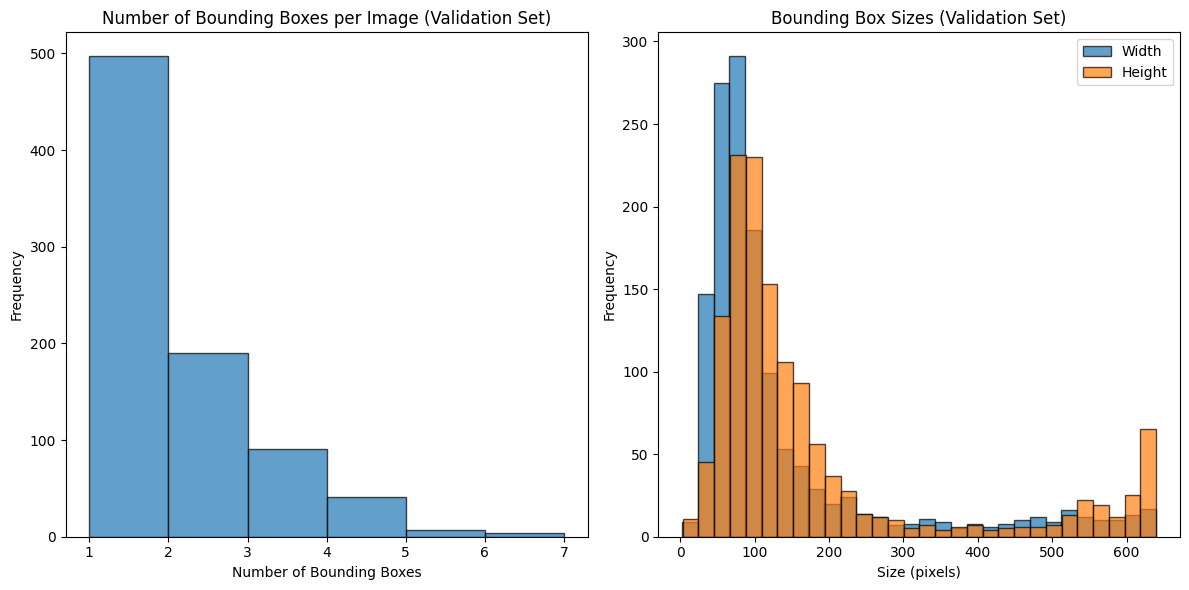

In [24]:
# Create lists to store statistics
num_boxes_list = []
box_widths = []
box_heights = []

# Loop through all label files in the validation set
for label_file in validation_label_files:
    # Get full path of label file
    label_path = os.path.join(validation_labels_dir, label_file)

    # Count bounding boxes
    num_boxes = count_bounding_boxes(label_path)
    num_boxes_list.append(num_boxes)

    # Read the bounding boxes and extract sizes
    sample_image_path = os.path.join(validation_images_dir, os.path.splitext(label_file)[0] + '.jpg')
    img = cv2.imread(sample_image_path)
    img_height, img_width = img.shape[:2]
    boxes = load_yolo_annotations(label_path, img_width, img_height)

    for _, _, _, box_width, box_height in boxes:
        box_widths.append(box_width)
        box_heights.append(box_height)

# Plot histograms
plt.figure(figsize=(12, 6))

# Number of bounding boxes
plt.subplot(1, 2, 1)
plt.hist(num_boxes_list, bins=range(1, max(num_boxes_list) + 2), edgecolor='black', alpha=0.7)
plt.title('Number of Bounding Boxes per Image (Validation Set)')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Frequency')

# Bounding box sizes
plt.subplot(1, 2, 2)
plt.hist(box_widths, bins=30, alpha=0.7, label='Width', edgecolor='black')
plt.hist(box_heights, bins=30, alpha=0.7, label='Height', edgecolor='black')
plt.title('Bounding Box Sizes (Validation Set)')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
